In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/urban-traffic-density-in-cities/futuristic_city_traffic.csv


In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [3]:
# Load Data

In [5]:
df = pd.read_csv('/kaggle/input/urban-traffic-density-in-cities/futuristic_city_traffic.csv')

In [54]:
df.head(10)

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544
5,TechHaven,Autonomous Vehicle,Snowy,Recession,Thursday,20,30.5179,0,0,37.5562,0.0843
6,Ecoopolis,Autonomous Vehicle,Rainy,Recession,Monday,21,43.9222,0,0,39.0420,0.0293
7,Ecoopolis,Autonomous Vehicle,Snowy,Stable,Friday,20,20.4236,0,0,18.1543,0.1393
8,MetropolisX,Drone,Snowy,Recession,Saturday,7,69.9735,0,0,41.8502,0.1505
9,SolarisVille,Drone,Snowy,Booming,Saturday,15,37.9431,0,0,18.9715,0.2485


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


In [21]:
df.describe()

,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
count,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06,1.219567e+06
mean,1.150817e+01,5.994476e+01,1.546992e-01,4.988738e-02,4.946464e+01,2.770960e-01
std,6.919071e+00,2.663203e+01,3.616178e-01,2.177123e-01,2.528014e+01,2.191019e-01
min,0.000000e+00,6.693400e+00,0.000000e+00,0.000000e+00,4.929600e+00,5.900000e-03
25%,6.000000e+00,3.753310e+01,0.000000e+00,0.000000e+00,2.927395e+01,1.059000e-01
50%,1.200000e+01,5.847110e+01,0.000000e+00,0.000000e+00,4.578260e+01,2.186000e-01
75%,1.700000e+01,8.053455e+01,0.000000e+00,0.000000e+00,6.590550e+01,3.960000e-01
max,2.300000e+01,1.630886e+02,1.000000e+00,1.000000e+00,1.899489e+02,3.377600e+00


In [ ]:
# Data Cleaning

In [9]:
import pandas as pd
import numpy as np

# read in all our data

df = pd.read_csv('/kaggle/input/urban-traffic-density-in-cities/futuristic_city_traffic.csv')

# set seed for reproducibility
np.random.seed(0)

In [10]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
dtype: int64

In [11]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


In [12]:
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
dtype: int64

In [ ]:
# There are no missing value in dataframe above

In [19]:
# Data Visualization

Setup Complete


Text(0, 0.5, 'Average Traffic Volume')

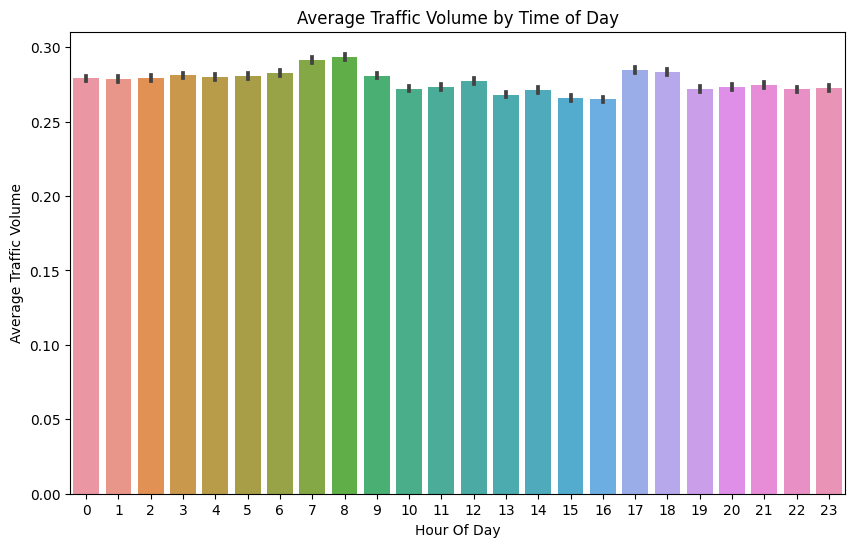

In [30]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

# Load the dataset
df = pd.read_csv('/kaggle/input/urban-traffic-density-in-cities/futuristic_city_traffic.csv')

# Example visualization: Average Traffic Volume by Time of Day
# Let's assume 'time_of_day' and 'traffic_volume' are columns in your dataset
# and 'time_of_day' has been calculated as shown in previous steps.

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Traffic Volume by Time of Day")

# Bar chart showing average traffic volume by time of day
sns.barplot(x=df['Hour Of Day'], y=df['Traffic Density'])

# Add labels for axes
plt.xlabel("Hour Of Day")
plt.ylabel("Average Traffic Volume")

In [ ]:
# Total Counts of Vehicle Types by Day of Week

Setup Complete


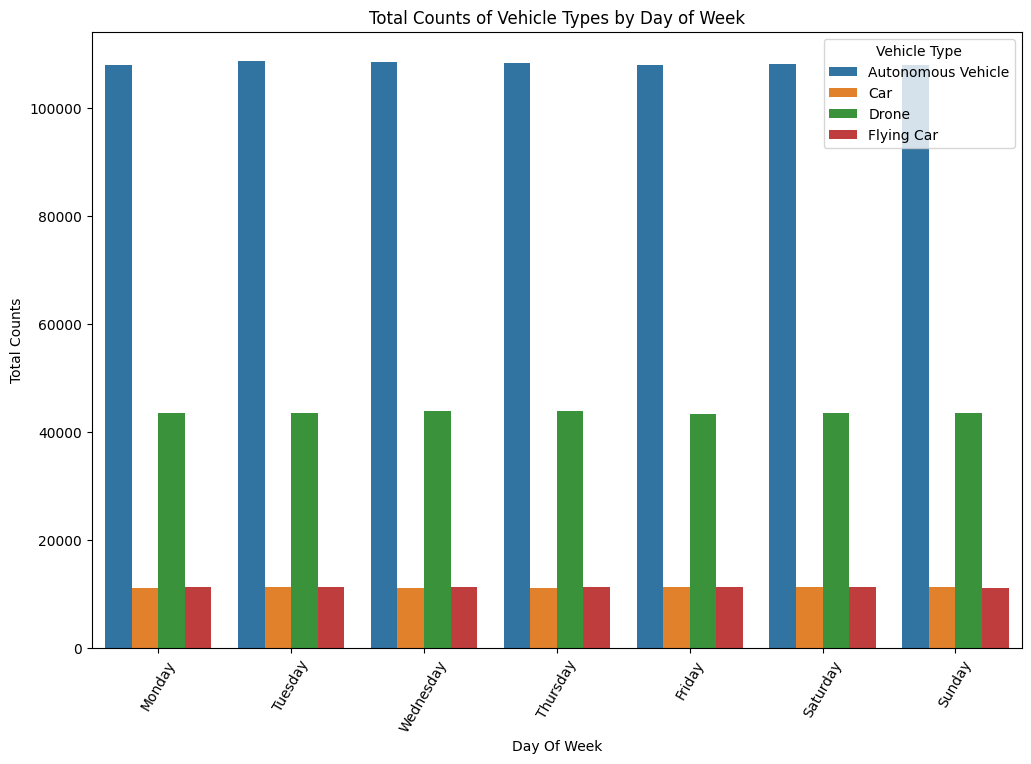

In [56]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

# Load the dataset
df = pd.read_csv('/kaggle/input/urban-traffic-density-in-cities/futuristic_city_traffic.csv')

# Create a new DataFrame for aggregated counts
vehicle_counts = df.groupby(['Day Of Week', 'Vehicle Type']).size().reset_index(name='Counts')

# Define the correct order for the days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Now visualize, ensuring the days of the week are in the correct order
plt.figure(figsize=(12, 8))
sns.barplot(data=vehicle_counts, x='Day Of Week', y='Counts', hue='Vehicle Type', order=day_order)
plt.title('Total Counts of Vehicle Types by Day of Week')
plt.ylabel('Total Counts')
plt.xticks(rotation=60) # Rotating the x-axis labels for better readability
plt.show()

In [35]:
# Vehicle Types by Weather

Setup Complete


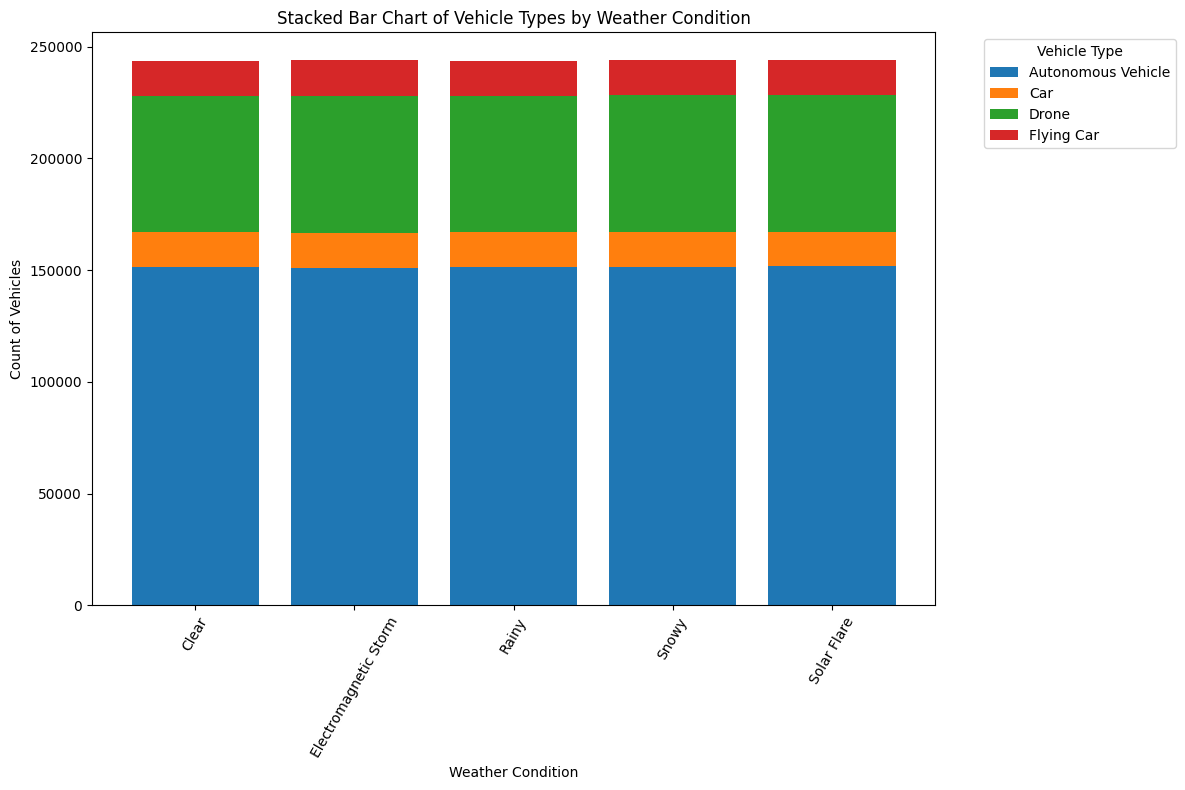

In [40]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

# Load the dataset
df = pd.read_csv('/kaggle/input/urban-traffic-density-in-cities/futuristic_city_traffic.csv')

# Calculate counts of each vehicle type for each weather condition and pivot for stacked bar chart
vehicle_weather_counts = df.groupby(['Weather', 'Vehicle Type']).size().reset_index(name='Counts')
vehicle_weather_counts_pivot = vehicle_weather_counts.pivot(index='Weather', columns='Vehicle Type', values='Counts').fillna(0)

# Plotting a stacked bar chart
vehicle_weather_counts_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.8)

plt.title('Stacked Bar Chart of Vehicle Types by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count of Vehicles')
plt.xticks(rotation=60)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend

plt.show()

In [ ]:
# Compare the energy consumption of different vehicle types across various cities.

Setup Complete


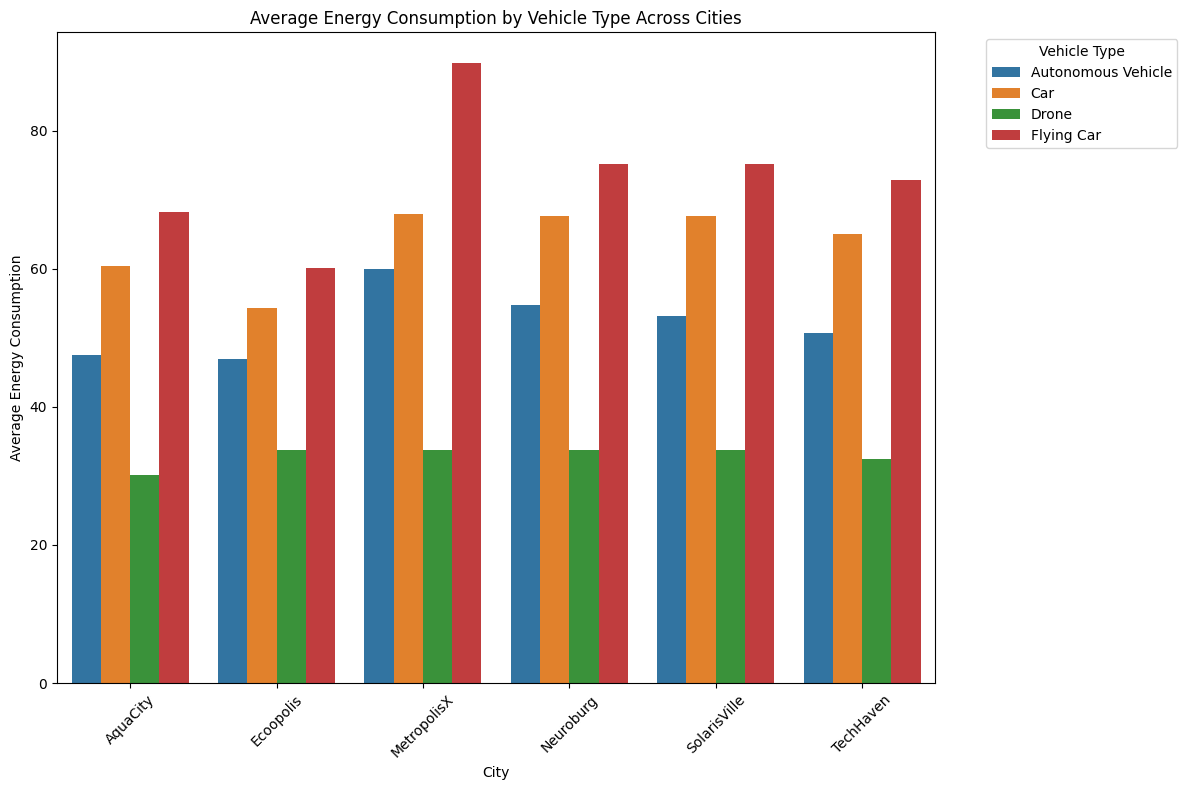

In [41]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

# Load the dataset
df = pd.read_csv('/kaggle/input/urban-traffic-density-in-cities/futuristic_city_traffic.csv')

# Assuming 'Energy Consumption' is already in a suitable numeric format
# Aggregate data to get average energy consumption for each vehicle type in each city
avg_energy_consumption = df.groupby(['City', 'Vehicle Type'])['Energy Consumption'].mean().reset_index()

# Create the grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_energy_consumption, x='City', y='Energy Consumption', hue='Vehicle Type')

plt.title('Average Energy Consumption by Vehicle Type Across Cities')
plt.xlabel('City')
plt.ylabel('Average Energy Consumption')
plt.xticks(rotation=45) # Optional: Rotate city names for better readability
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position

plt.tight_layout()  # Adjust layout to make room for the legend and labels
plt.show()

In [43]:
# Comparison of how energy consumption trends vary across different conditions and vehicle types.

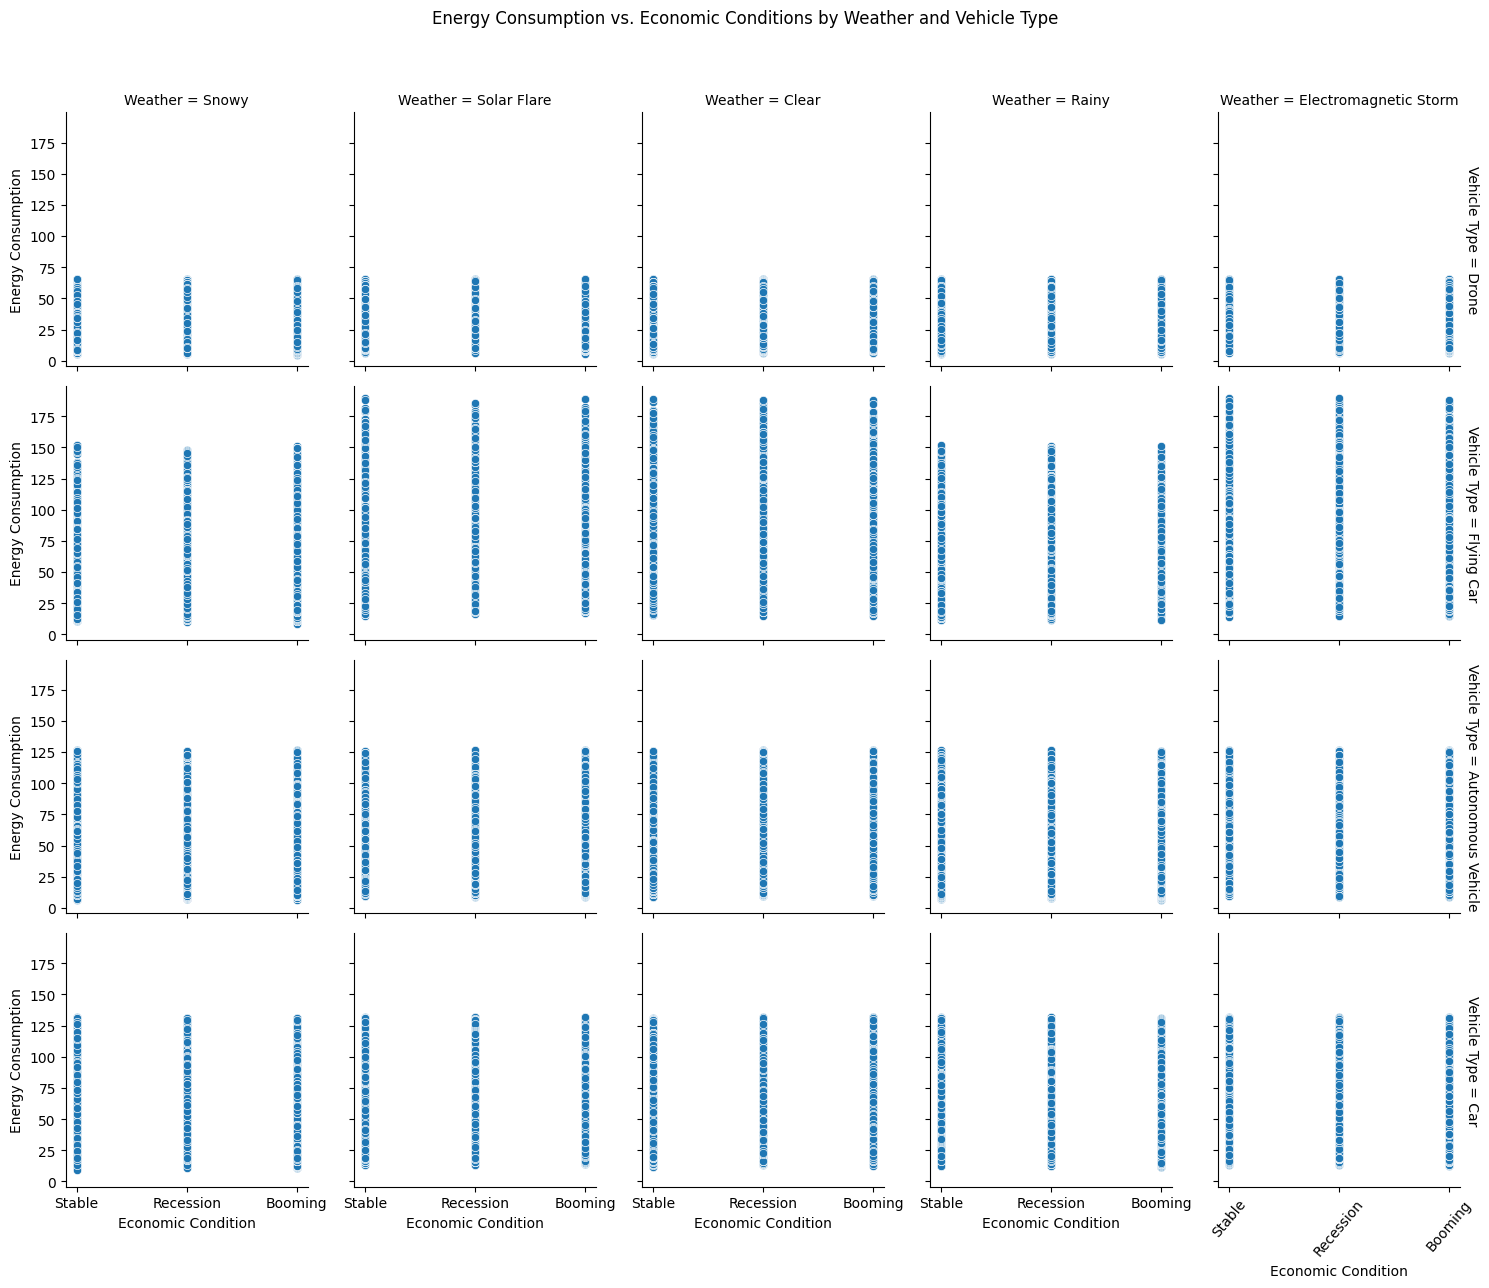

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your loaded DataFrame
# Adjust the column names based on the actual names printed out
weather_column = "Weather"  # Adjust based on actual column name
vehicle_type_column = "Vehicle Type"  # Adjust based on actual column name
economic_conditions_column = "Economic Condition"  # Adjust based on actual column name
energy_consumption_column = "Energy Consumption"  # Adjust based on actual column name

# Create a FacetGrid
g = sns.FacetGrid(df, col=weather_column, row=vehicle_type_column, margin_titles=True, height=3)

# Map a scatter plot to each subset, using the correct column names
g.map_dataframe(sns.scatterplot, x=economic_conditions_column, y=energy_consumption_column)

# Add a title for the entire plot
g.fig.suptitle('Energy Consumption vs. Economic Conditions by Weather and Vehicle Type', y=1.03)

# Adjust layout for better readability
g.fig.tight_layout()

# Add axis labels
g.set_axis_labels(economic_conditions_column, energy_consumption_column)

# Rotate the x-axis labels for clarity if needed
plt.xticks(rotation=50)

# Show the plot
plt.show()

In [53]:
# Traffic Light Timing Optimization

In [55]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Example dataset: Average vehicle counts and wait times at an intersection
data = {'vehicle_count': [100, 150, 200, 250],
        'wait_time': [30, 45, 60, 75]}  # Hypothetical wait times in seconds

df = pd.DataFrame(data)

# Objective function: Minimize the total wait time
def objective(x):
    total_wait_time = sum(df['vehicle_count'] * x / df['wait_time'])
    return total_wait_time

# Initial guess for the traffic light timing (in seconds)
x0 = [30]

# Bounds for the timing (minimum 20 seconds, maximum 120 seconds)
bounds = [(20, 120)]

# Perform the optimization
result = minimize(objective, x0, bounds=bounds)

print(f"Optimized traffic light timing: {result.x[0]} seconds")

Optimized traffic light timing: 20.0 seconds
